<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


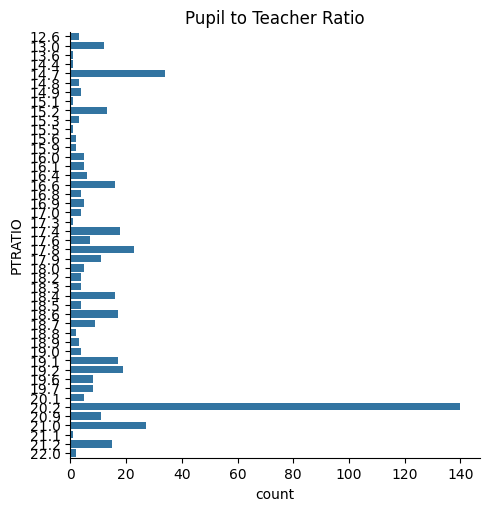

In [6]:
sns.catplot(y='PTRATIO', kind='count', data=boston_df)
pyplot.title("Pupil to Teacher Ratio")
pyplot.show()

The above histograph displays how many instances of specific pupil to teacher ratios are present.

### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Let α = 0.05

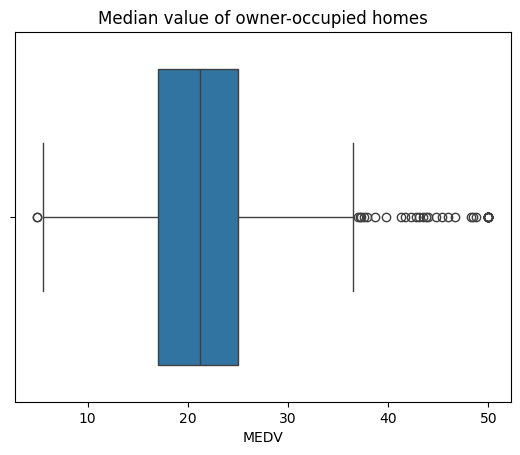

In [44]:
ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set_title('Median value of owner-occupied homes')
pyplot.show()

The above box plot shows the distribution of the median value of houses.

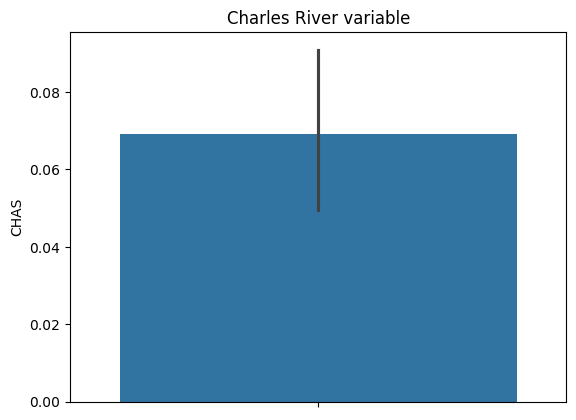

In [10]:
ax = sns.barplot(y='CHAS', data=boston_df)
ax.set_title('Charles River variable')
pyplot.show()

The above bar chart shows the statistics of houses bound to the Charles River.

Hypothesis:

* $H\_0: µ\_1 = µ\_2$ (There is no significant difference in median value of houses bounded by the Charles River.)
* $H\_1: µ\_1 ≠ µ\_2$ (There is a significant difference in median value of houses bounded by the Charles River.)

In [52]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [54]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value is less than the alpha value of 0.05, we will reject the null hypothesis as there is enough evidence to suggest a significant different in median value of houses bounded by the Charles River.

### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Let α = 0.05

In [46]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

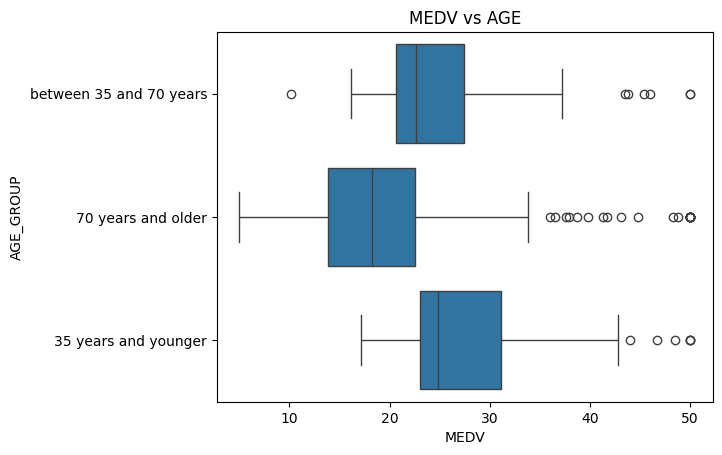

In [47]:
ax = sns.boxplot(y='AGE_GROUP', x='MEDV', data=boston_df)
ax.set_title("MEDV vs AGE")
pyplot.show()

The above box plot shows the distribution of the medium values of houses for each proportion of owner occupied units across three seperate age ranges.

Hypothesis:

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (The three population means are equal.)
*   $H\_1:$ At least one of the means differ.

In [36]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [41]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [42]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than the alpha value of 0.05, we will reject the null hypothesis as there is enough evidence that at least one of the means differs.

### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Let α = 0.05

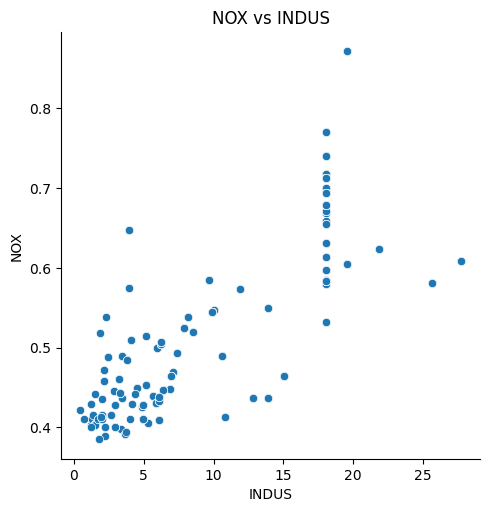

In [48]:
ax = sns.relplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title("NOX vs INDUS")
pyplot.show()

The above scatter plot displays the relationship between the proportion of non-retail business acres per town and the nitric oxide concentrations.

Hypothesis:

*   $H\_0:$ There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
*   $H\_1:$ There is a relationship between Nitric oxide concentrations and the proportion of non-retail buisness acres per town.

In [50]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value is less than the alpha value of 0.05, we will reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Let α = 0.05

Hypothesis:

*   $H\_0:$ There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
*   $H\_1:$ There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [55]:
X = boston_df['MEDV']
Y = boston_df['DIS']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        15:08:23   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than the alpha value of 0.05, we will reject the null hypothesis. The coefficient 0.0572 means that an additional weighted distance to the five Boston employment centers has about a 0.0572 times effect on the median value of owner occupied homes.